In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time, os, sys, gc


import h5py 

import svgutils.transform as sg 
import sys 

import matplotlib.patches as patches

from scipy.integrate import solve_ivp

import class_energy as energy
import class_equations_of_motion as eom 

import class_handle_input as h_in
import class_handle_wavefunctions as h_wavef

import class_visualization as vis
import class_mass_size as mass_size

In [11]:
def get_E_arr(Mx_list, My_list, folder, check_sys):
    h5_io_object = h_in.io_hdf5()
    
    E_s_arr = np.zeros(len(Mx_list), dtype=complex)
    for i in range(len(Mx_list)):
        Mx = Mx_list[i]
        My = My_list[i]

        check_sym = 'Mx_'+str(Mx)+'_My_'+str(My)+'.'
        file_list = [f for f in os.listdir(folder) if check_sys in f and check_sym in f]

        if len(file_list) > 1: 
            break
        for file in file_list:
            file_name = folder+file
            psi, params = h5_io_object.get_psi(file_name)

            energy_object = energy.energy(params=params)
            E, E_T, E_B, E_V = energy_object.calc_energy(psi)
            E_s_arr[i] = E
    return E_s_arr

In [12]:
def plot_rotor_wavefunction(x, chosen_My, chosen_Mx, psi):
    A = 6
    plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
    ##plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    #plt.rc('text.latex', preambler=r'\usepackage{textgreek}')
    font_size = 18 

    fig, axs = plt.subplots(chosen_My,chosen_Mx, subplot_kw=dict(polar=True))
    #plt.suptitle(r'$V_0 =$'+str(V_0), fontsize=font_size)

    for i in range(chosen_My):
         for j in range(chosen_Mx):
            #axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_My/2))%chosen_My], color='lightcoral')

            axs[i, j].plot(x, psi[(i+int(chosen_My/2))%chosen_My,(j+int(chosen_Mx/2))%chosen_Mx], color='lightcoral')


            axs[i, j].set_yticklabels([])
            axs[i, j].set_xticklabels([])
            axs[i, j].set_theta_zero_location('E')

            axs[i, j].grid(linewidth=0.5)
            axs[i, j].spines['polar'].set_linewidth(0.3) #.set_visible(False)

    #axs[0, 0].set_theta_zero_location('E')
    #lines, labels = axs[0, 0].set_thetagrids((0, 45, 90, 135, 180), (r'0', ' ', r'$\pi/2$', ' ', r'$\pi$'))

In [13]:
params = {"n": 256,
"M": 36,
"Mx": 6,
"Mx_display": 4,
"converge_new_lattice": "no",
"My": 6,
"My_display": 4,
"B": 1.0,
"tx": 100,
"ty": 100,
"V_0": 150.0,
"qx": 0,
"qy": 0,
"init_choice": "uniform",
"external_wf_tag": " ",
"excitation_no": 11,
"angle_pattern": [0,0,0,0],
"V_0_pattern": [0,0,0,0],
"n_states": 0,
"path_to_input_wavefunction": " ",
"dt": 0.001,
"tol": 1e-7}

x = (2*np.pi/params["n"])*np.arange(params["n"])

''' 
I/O Objects
'''
h5_io_object = h_in.io_hdf5()

check_sys = 'tx_'+str(params["tx"])+'_ty_'+str(params["ty"])+'_V0_'+str(params["V_0"])

[0.05032844-6.48212508e-20j 0.01145677-4.09575662e-20j
 0.0017026 +9.41948463e-22j 0.00010094+2.19371299e-21j
 0.        +0.00000000e+00j]


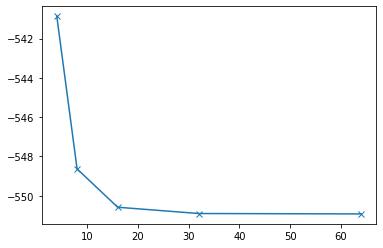

In [16]:
Mx_list_fo = 2**(np.arange(2,7))
My_list_fo = 2**(np.arange(2,7))

folder = 'results/numerics_verification/fo/'

E_size_fo_arr = get_E_arr(Mx_list_fo, My_list_fo, folder, check_sys)
print((E_size_fo_arr-E_size_fo_arr[-1])/200)
plt.plot(Mx_list_fo, E_size_fo_arr.real, marker='x')

[-601.45018058+9.98597421e-17j -595.82906873+1.43669417e-17j
 -587.52007157+5.49719147e-17j -581.44686197+2.78473012e-17j
 -580.3744361 +2.29190220e-17j -580.35152471+7.88355026e-18j
 -580.35103204-8.11067743e-18j]


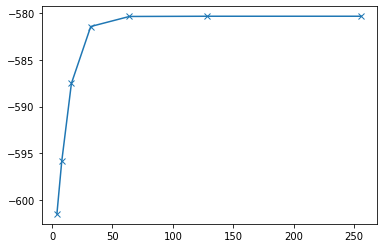

In [6]:
My_list_fdv = 2**(np.arange(2,9))
Mx_list_fdv = 4*np.ones(len(My_list_fdv), dtype=int)

folder = 'results/numerics_verification/fdv/'

E_size_fdv_arr = get_E_arr(Mx_list_fdv, My_list_fdv, folder, check_sys)
print(E_size_fdv_arr)
plt.plot(My_list_fdv, E_size_fdv_arr.real, marker='x')

[-601.45018058+2.61617752e-17j -595.82906873+1.15089378e-16j
 -587.52007157+3.08975865e-17j -581.44686197+7.15354504e-17j
 -580.3744361 +2.24858806e-17j -580.35152471-2.97328043e-17j
 -580.35103204-3.95387349e-17j]


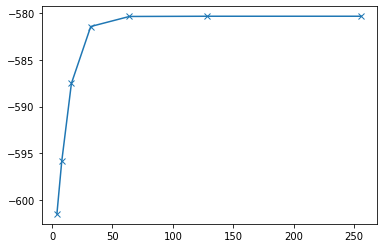

In [7]:
Mx_list_fdh = 2**(np.arange(2,9)) 
My_list_fdh = 4*np.ones(len(Mx_list_fdh), dtype=int)

folder = 'results/numerics_verification/fdh/'

E_size_fdh_arr = get_E_arr(Mx_list_fdh, My_list_fdh, folder, check_sys)
print(E_size_fdh_arr)
plt.plot(Mx_list_fdh, E_size_fdh_arr.real, marker='x')

[-565.61131705-2.13102502e-17j -565.61131705+1.00793601e-16j
 -565.61131705+2.40229373e-16j -565.61131705-4.71780608e-17j
 -565.61131705-2.78013085e-17j]
[-565.61131705-2.13102502e-17j -565.61131705+1.00793601e-16j
 -565.61131705+2.40229373e-16j -565.61131705-4.71780608e-17j
 -565.61131705-2.78013085e-17j]


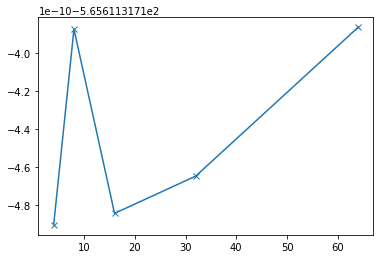

In [8]:
Mx_list_sp = 2**(np.arange(2,7))
My_list_sp = 2**(np.arange(2,7))

folder = 'results/numerics_verification/sp/'

E_size_sp_arr = get_E_arr(Mx_list_sp, My_list_sp, folder, check_sys)
print(E_size_sp_arr)
plt.plot(Mx_list_sp, E_size_sp_arr.real, marker='x')
print(E_size_sp_arr)

In [64]:
def E_to_plot(E,E_0):
    return np.abs(E-E_0)/np.abs(E_0)

/tmp/ipykernel_4130176/2445697277.py:2: RuntimeWarning: invalid value encountered in divide
  return np.abs(E-E_0)/np.abs(E_0)


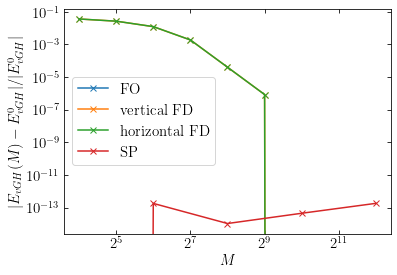

In [69]:
E_0_fo = np.min(E_size_fo_arr)
E_0_fdv = np.max(E_size_fdv_arr)
E_0_fdh = np.max(E_size_fdh_arr)
E_0_sp = np.min(E_size_sp_arr)

A = 6
plt.rc('figure', figsize=[46.82 * .5**(.5 * A), 33.11 * .5**(.5 * A)])
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
font_size = 15

fig, axs = plt.subplots()

axs.plot(Mx_list_fo**2, E_to_plot(E_size_fo_arr, E_0_fo), marker='x', label=r'FO')
axs.plot(My_list_fdv*Mx_list_fdv, E_to_plot(E_size_fdv_arr, E_0_fdv), marker='x', label=r'vertical FD')
axs.plot(Mx_list_fdh*My_list_fdh, E_to_plot(E_size_fdh_arr, E_0_fdh), marker='x', label=r'horizontal FD')
axs.plot(Mx_list_sp**2, E_to_plot(E_size_sp_arr, E_0_sp), marker='x', label=r'SP')


axs.set_xlabel(r'$M$', fontsize=font_size)
axs.set_ylabel(r'$|E_{vGH}(M) - E_{vGH}^0|/|E_{vGH}^0|$', fontsize=font_size)

plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)

axs.set_xscale('log', base=2)
axs.set_yscale('log')

plt.legend(fontsize=15)

plt.tick_params(axis='x', direction='in', length=4, top=True)
plt.tick_params(axis='y', direction='in', length=4, right=True)

plt.tick_params(which='minor', axis='y', direction='in', right=True)

In [59]:
params["tx"] = 95
params["ty"] = 105

params["Mx"] = 4
params["My"] = 20

params["V_0"] = 150

params["tol"] = 1e-7

params["init_choice"] = "ferro_domain_vertical_wall"
psi_fo, E_evo_fo, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

print(E_evo_fo[-1])

-590.9894147463673


In [ ]:
params["init_choice"] = "ferro_domain_vertical_wall"
psi_fdv, E_evo_fdv, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

params["init_choice"] = "ferro_domain_horizontal_wall"
psi_fdh, E_evo_fdh, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

params["init_choice"] = "small_polaron"
psi_sp, E_evo_sp, V, dE_dtx, dE_dty = solve_imag_time_prop(params)

max_psi = np.max(np.array([np.abs(psi_fo)**2,np.abs(psi_fdv)**2,np.abs(psi_fdh)**2,np.abs(psi_sp)**2])).real